In [8]:
import torch

# Segons copilot, en el cas de fer Attention mechanism per generar reviews:
# Query -> current token tal que el model està intenant generar el SEGÜENT token
# Key -> tots els tokens de la seqüència generada fins ara
# Value -> all the tokens in the sequence generated so far, which are used, weighted by the attention scores, to generate the next token

# rows -> query positions (Q)
# cols -> key positions (K)

# Per tant la Query en cada "step" és el últim token
# La Key són tots els tokens anteriors a aquests
# Per calcular l'attention, que és com el pes que ha de tenir cada token anterior per generar el següent,
# es fa el producte escalar entre la Query i la Key, i es normalitza amb softmax
# Això dóna els pesos que ha de tenir cada token anterior per generar el següent
# Finalment, es multiplica aquests pesos pels tokens anteriors (Value) per obtenir el següent token
# Això es fa per cada token de la seqüència

# Attention = softmax(QK^T / sqrt(d_k))V
# Q -> query
# K -> key
# V -> value
# d_k -> dimension of the key
# softmax -> normalizes the attention scores
# sqrt(d_k) -> scaling factor
# QK^T -> dot product of query and key
# QK^T / sqrt(d_k) -> scaled dot product
# softmax(QK^T / sqrt(d_k)) -> attention scores
# softmax(QK^T / sqrt(d_k))V -> attention values


def generate_square_subsequent_mask(total_len):
    # torch.ones -> probably tots 1's, de mica total_len x total_len
    # torch.tril -> triangle lower, meaning it put to 0 all the elements above the diaonal (es queda amb el traingle inferior)
    # mask == 0 -> ho inverteix tot, pq les màscares vol dir el que NO tens permès de veure
    mask = torch.tril(torch.ones(total_len, total_len))  # (total_len, total_len), lower triangle -> 1.; others 0.
    mask = mask == 0  # lower -> False; others True
    return mask

In [9]:
generate_square_subsequent_mask(4) # per tant aquí els True signifiquen que no puguis veure els pròxims tokens a tu
# no entenc del tot com pot ser que un es pugui ell mateix, no es generaria així simplement sempre ell mateix?
# NO pq el que estàs intentant predir és el SEGÜENT token, no el mateix token.

tensor([[False,  True,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True],
        [False, False, False, False]])

In [3]:
# Té un extra False, que segons el que diu allows to attend for user and item (en el hidden[0] suposo?)

def generate_peter_mask(src_len, tgt_len):
    total_len = src_len + tgt_len
    mask = generate_square_subsequent_mask(total_len)
    mask[0, 1] = False  # allow to attend for user and item (False = attend????)
    print('peter_mask')
    return mask

In [4]:
generate_peter_mask(3, 1) # ~

peter_mask


tensor([[False, False,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True],
        [False, False, False, False]])

peter_mask


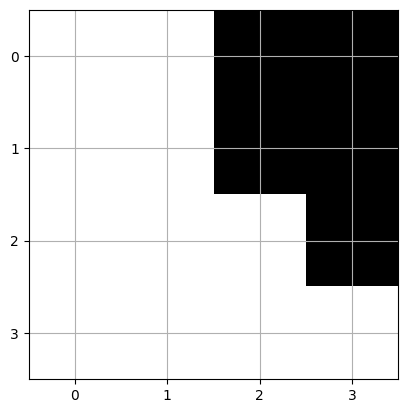

In [5]:
from utils.module import plot_mask

# crec que negre = attend, blanc = no attend
plot_mask(generate_peter_mask(3, 1)) # a bit inútil el plot ngl?

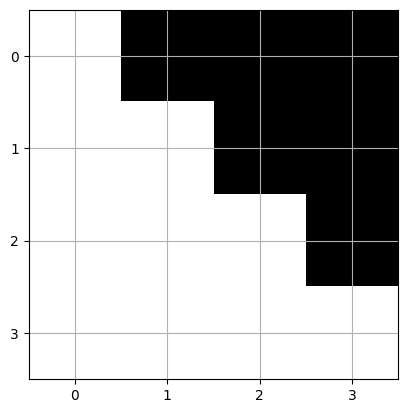

In [6]:
plot_mask(generate_square_subsequent_mask(4))